**NAMA  : Anggun Lisnawati**</br>
**NIM   :211351019**</br>
**KELAS : Malam B**



**Data Preparation**</br>
Import dulu Kagglenya

In [38]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggunlisnawati","key":"6333d008a14f32924223adddca6b0a61"}'}

In [39]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Dilanjut untuk mendownload Data set nya

In [40]:
!kaggle datasets download -d tawfikelmetwally/chicago-house-price

  0% 0.00/1.58k [00:00<?, ?B/s]
100% 1.58k/1.58k [00:00<00:00, 4.16MB/s]


Buka data set nya

In [41]:
!mkdir chicago-house-price
!unzip chicago-house-price.zip -d chicago-house-price
!ls chicago-house-price

mkdir: cannot create directory ‘chicago-house-price’: File exists
Archive:  chicago-house-price.zip
  inflating: chicago-house-price/realest.csv  
realest.csv


Impor Pustaka dan datanya

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Eskplorasi data**

In [43]:
df = pd.read_csv('/content/chicago-house-price/realest.csv')

In [44]:
df . head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


Melihat data Type

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


Sebelumnya kita cek terlebih dahulu data yang kosong

In [46]:
df.isna().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

Karena ada data yang kosong, kita isi terlebih dahulu

In [47]:
df.fillna(0, inplace=True)

Sudah diisi kita cek kembali datanya

In [48]:
df.isna().sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

Data sudah ter isi

**Visualisasi Data**

<Axes: >

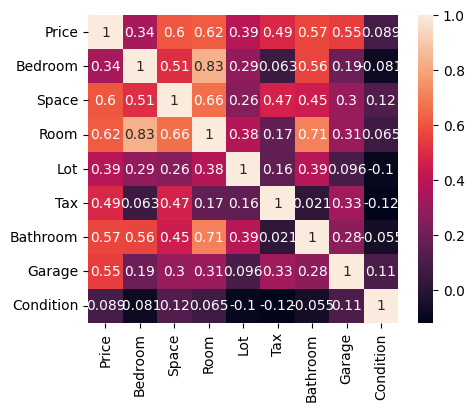

In [49]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)

Datanya sudah ok

<Axes: >

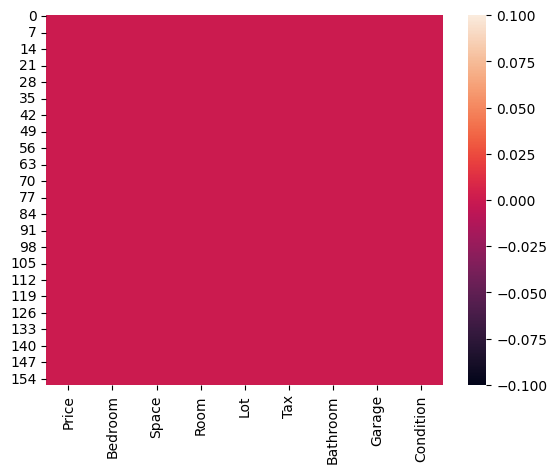

In [50]:
sns.heatmap(df.isnull())

([<matplotlib.patches.Wedge at 0x7de1fde19e70>,
 [Text(-0.8267213551379025, 0.7256251104798885, '121'),
  Text(0.8267213551379025, -0.7256251104798886, '36')])

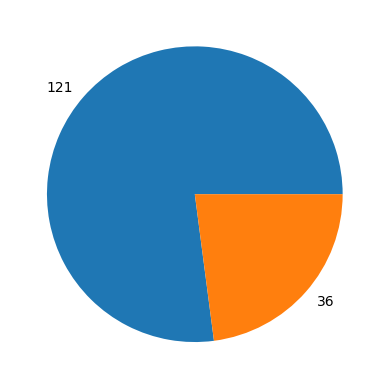

In [51]:
plt.pie(df['Condition'].value_counts(),
       labels = df['Condition'].value_counts())

Menampilkan bar pie menunjukan bahwa, rumah yang kondisinya bagus terdapat 121 rumah dan kondisi sebaliknya 36 rumah

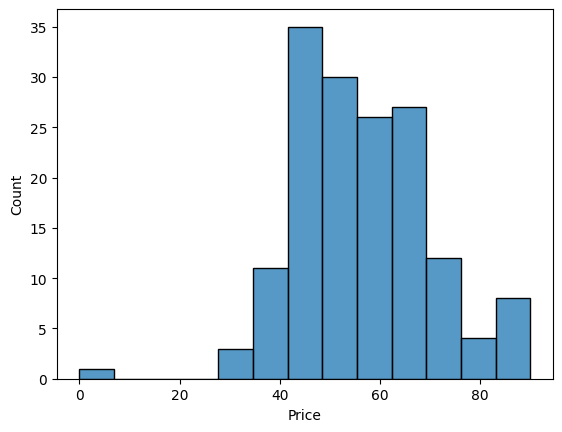

In [60]:
target = df['Price']
sns.histplot(target);

**Data Preprocessing**</br>
Datanya kita proses terlebih dahulu..




In [52]:
X = df.drop('Price', axis='columns')
y = df['Price']

**Modelling**</br>
Kita langsung eksekusi



In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=70)

In [54]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [55]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.7285612813499596


Akhirnya akurasi model 72%

In [56]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [57]:
input_data = np.array([[2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0]])

prediction = lr.predict(input_data)
print('Estimasi harga rumah di Chicago :', prediction)

Estimasi harga rumah di Chicago : [49.94484087]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Pickle**

In [58]:
import pickle

filename = 'Anggun_Malam_B.sav'
pickle.dump(lr,open(filename,'wb'))